In [1]:
import numpy as np
from enviroment import Env
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline 

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def epsilon_greedy(eps, action_values):
    if np.random.uniform(0, 1) > eps:
        action = np.argmax(action_values)
    else:
        action = np.random.randint(0, 2)        
    return action

In [3]:
def getAction(state, N0, actionValues, actionValuesCount):
    epsilon = N0 / (N0 + np.sum(actionValuesCount[state[0] - 1, state[1] - 1, :]))
    return epsilon_greedy(epsilon, actionValues[state[0] - 1, state[1] - 1, :])

In [4]:
def stateActionUpdate(reward, stateActions, actionValues, actionValuesCount):
    for state, action in stateActions:
        current_value = actionValues[state[0] - 1, state[1] - 1, action]
        error = (1.0 / actionValuesCount[state[0] - 1, state[1] - 1, action]) * (reward - current_value)
        actionValues[state[0] - 1, state[1] - 1, action] = current_value + error

In [5]:
def monteCarlo(numberOfIterations, N0):
    actionValues = np.zeros([10, 21, 2])
    actionValuesCount = np.ones([10, 21, 2])
    for i in range(numberOfIterations):
        game = Env()
        state = game.getCurrentState()
        total_reward = 0
        stateActionsVisited = []
        while not game.isGameOver():
            action = getAction(state, N0, actionValues, actionValuesCount)
            actionValuesCount[state[0] - 1, state[1] - 1, action] += 1
            stateActionsVisited.append((state, action))
            new_state, reward = game.step(state, action)
            total_reward += reward
            state = new_state
        stateActionUpdate(total_reward, stateActionsVisited, actionValues, actionValuesCount)
    return actionValues, actionValuesCount

In [6]:
Q, N = monteCarlo(1000000, 150)

In [7]:
def plotValueFunction(actionValues):
    stateValue = np.amax(actionValues, axis=2)
    x = np.arange(1, 11)
    y = np.arange(1, 22)
    xs, ys = np.meshgrid(x, y)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_wireframe(xs, ys, stateValue.T, rstride=1, cstride=1)

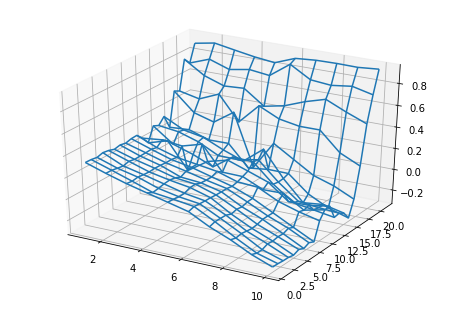

In [8]:
plotValueFunction(Q)